In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os 
import keras
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [2]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range= 3.0,rescale=1/255, horizontal_flip = True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [3]:
train = train_datagen.flow_from_directory(directory="C:/Users/RAAM/coconut tree detection/coconut tree/testing and traing/train",target_size = (256,256),batch_size= 32)
val = train_datagen.flow_from_directory(directory="C:/Users/RAAM/coconut tree detection/coconut tree/testing and traing/val",target_size = (256,256),batch_size= 32)

Found 118 images belonging to 5 classes.
Found 118 images belonging to 5 classes.


In [4]:
t_img,label = train.next()

In [5]:
def plotImage(img_arr,label):
    for im, lin in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


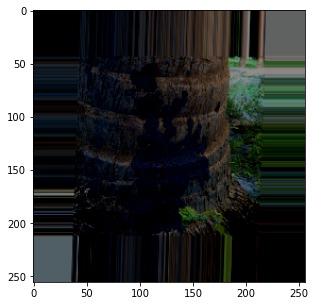

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


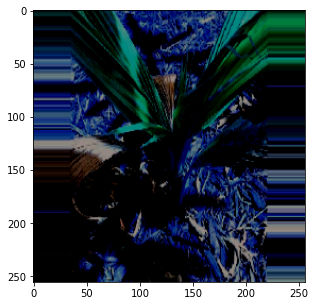

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


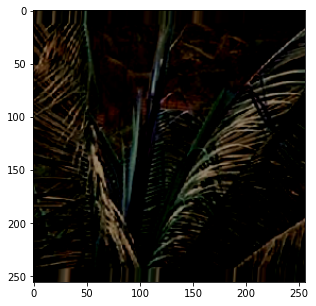

In [6]:
plotImage(t_img[:3],label[:3])

# creating a model 

In [7]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

In [8]:
base_model = VGG19(input_shape=(256,256,3),include_top = False)

In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
x = Flatten()(base_model.output)

x =Dense(units=5,activation='softmax')(x)

#create a  model 

model = Model(base_model.input ,x)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [17]:
# model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.compile(
    optimizer='adam',
    loss = keras.losses.categorical_crossentropy,
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Early stopping and model check point

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping 

es = EarlyStopping(monitor='val_accuracy',min_delta= 0.01,patience= 3,verbose= 1)

# model check point 

mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor='val_accuracy',
                     min_delta= 0.01,
                     patience= 3,
                     verbose= 1,
                     save_best_only = True)

cb = [es, mc]

In [19]:
history = model.fit(
    train,
    batch_size = 16,
    validation_data = val,
    callbacks=cb,
    verbose=1,
    epochs=5,
)

Epoch 1/5
4/4 [==============================] - ETA: 0s - loss: 3.2560 - accuracy: 0.3475 
Epoch 1: val_accuracy improved from -inf to 0.22034, saving model to best_model.h5
4/4 [==============================] - 157s 43s/step - loss: 3.2560 - accuracy: 0.3475 - val_loss: 3.6455 - val_accuracy: 0.2203
Epoch 2/5
4/4 [==============================] - ETA: 0s - loss: 2.4474 - accuracy: 0.3729 
Epoch 2: val_accuracy improved from 0.22034 to 0.55085, saving model to best_model.h5
4/4 [==============================] - 157s 46s/step - loss: 2.4474 - accuracy: 0.3729 - val_loss: 1.7430 - val_accuracy: 0.5508
Epoch 3/5
4/4 [==============================] - ETA: 0s - loss: 1.5169 - accuracy: 0.5424 
Epoch 3: val_accuracy improved from 0.55085 to 0.58475, saving model to best_model.h5
4/4 [==============================] - 143s 41s/step - loss: 1.5169 - accuracy: 0.5424 - val_loss: 1.0842 - val_accuracy: 0.5847
Epoch 4/5
4/4 [==============================] - ETA: 0s - loss: 0.7401 - accuracy

In [20]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

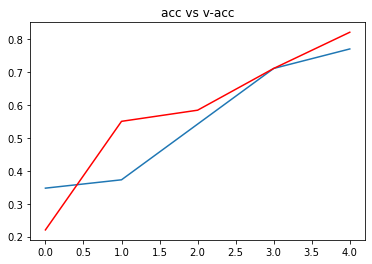

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c= 'red')
plt.title('acc vs v-acc')
plt.show()

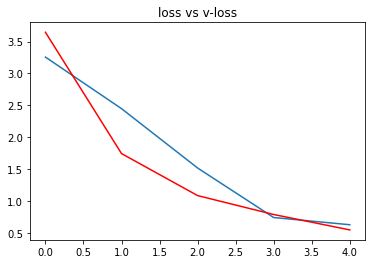

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title('loss vs v-loss')
plt.show()

In [23]:
#load best model 
from keras.models import load_model

model = load_model("C:/Users/RAAM/coconut tree detection/best_model.h5")

In [24]:
acc = model.evaluate(val)[1]
print(f'the accuracy of your {acc*100}%')

4/4 [==============================] - 69s 16s/step - loss: 0.4990 - accuracy: 0.8136
the accuracy of your 81.35592937469482%


In [25]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [26]:
import numpy as np
def prediction(path):
    img = load_img(path, target_size = (256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis=  0)
    
#     pred = model.predict(img)
    pred = np.argmax(model.predict(img))
    result = (f'the image belongs to { ref[pred]}')
     
    print(f'the image belongs to { ref[pred]}')

In [27]:
path ="C:/Users/RAAM/coconut tree detection/coconut tree/test/coconut-tree-dwarf-may-be-hybrid.jpg"
prediction(path)

1/1 [==============================] - 2s 2s/step
the image belongs to healthy


In [28]:
train.class_indices

{'bud_rot_disease': 0,
 'healthy': 1,
 'soil_disease': 2,
 'stem_bleeding': 3,
 'yellow_patch_or_leaf_rot': 4}

In [1]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
my_w = tk.Tk()
my_w.geometry("900x600")  # Size of the window 
my_w.title('Coconut')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Coconut Desis Detection',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

def clear():
    my_w.destroy()
Button(my_w,text='Clear and run again',command = clear).grid(row= 2,column= 3)


def upload_file():
    global img
    global path
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    img_resized=img.resize((300,200)) # new width & height
    img=ImageTk.PhotoImage(img_resized)
    b2 =tk.Button(my_w,image=img) # using Button 
    b2.grid(row=3,column=5)
    
    path =filename
    prediction(path)

import numpy as np
def prediction(path):
    img = load_img(path, target_size = (256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis=  0)
    
    global pred
#     pred = model.predict(img)
    pred = np.argmax(model.predict(img))
    Button(my_w,text='suggetion',command =suggetion ).grid(row= 4,column= 3)   
    
    result = (f'the image belongs to { ref[pred]}')
    
    l2 = tk.Label(my_w,text=result,width=30,font=my_font1)  
    l2.grid(row=4,column=1)
    

    
 
    print(f'the image belongs to { ref[pred]}')


    

   
my_w.mainloop() 


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\RAAM\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\RAAM\AppData\Local\Temp\ipykernel_684\4027993721.py", line 13, in <lambda>
    width=20,command = lambda:upload_file())
  File "C:\Users\RAAM\AppData\Local\Temp\ipykernel_684\4027993721.py", line 33, in upload_file
    prediction(path)
  File "C:\Users\RAAM\AppData\Local\Temp\ipykernel_684\4027993721.py", line 37, in prediction
    img = load_img(path, target_size = (256,256))
NameError: name 'load_img' is not defined


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
